In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
player = pd.read_csv('data/baseball/player.csv', usecols=[0,1,13,14,15,16,17,18,19,20,21])
salary = pd.read_csv('data/baseball/salary.csv')
appearances = pd.read_csv('data/baseball/appearances.csv')
batting = pd.read_csv('data/baseball/batting.csv')
fielding = pd.read_csv('data/baseball/fielding.csv')
team = pd.read_csv('data/baseball/team.csv')
pitching = pd.read_csv('data/baseball/pitching.csv')

In [3]:
app_player = appearances.merge(player)

In [4]:
app_player['age'] = app_player.year - app_player.birth_year

In [5]:
appearances['age'] = app_player.age

For the project, we are looking at the importance of salary for building a baseball team.

### Salary Over Time

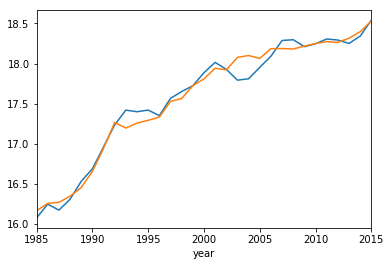

In [6]:
np.log(salary[salary.league_id == 'AL'].groupby(['year', 'team_id'])['salary'].sum().groupby('year').median()).plot()
np.log(salary[salary.league_id == 'NL'].groupby(['year', 'team_id'])['salary'].sum().groupby('year').median()).plot()

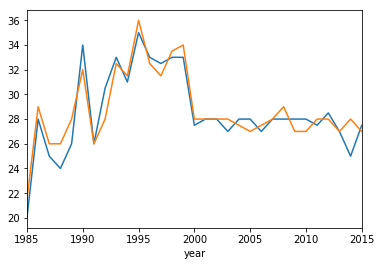

In [7]:
(salary[salary.league_id == 'AL'].groupby(['year', 'team_id']).size().groupby('year').median()).plot()
(salary[salary.league_id == 'NL'].groupby(['year', 'team_id']).size().groupby('year').median()).plot()

In [8]:
salary[salary.year == 2015].groupby('team_id')['salary'].sum().median() / salary[salary.year == 1985].groupby('team_id')['salary'].sum().median()

11.202202483475384

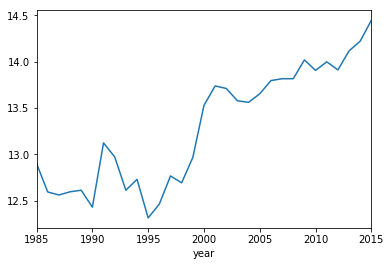

In [9]:
np.log(salary.groupby('year')['salary'].median()).plot()

In [10]:
for year in range(2011, 2016):
    stats = salary[(salary.league_id == 'AL') & (salary.year == year)].groupby(['team_id'])['salary'].sum().describe()
    print(f'{year}:\n{stats}\n')

2011:
count    1.400000e+01
mean     9.765480e+07
std      4.793501e+07
min      3.571200e+07
25%      6.355998e+07
50%      8.920493e+07
75%      1.240260e+08
max      2.022750e+08
Name: salary, dtype: float64

2012:
count    1.400000e+01
mean     1.043745e+08
std      4.438653e+07
min      5.537250e+07
25%      7.559540e+07
50%      8.803155e+07
75%      1.293527e+08
max      1.965223e+08
Name: salary, dtype: float64

2013:
count    1.500000e+01
mean     1.022085e+08
std      5.141290e+07
min      1.789070e+07
25%      7.467127e+07
50%      8.439333e+07
75%      1.252314e+08
max      2.319789e+08
Name: salary, dtype: float64

2014:
count    1.500000e+01
mean     1.018388e+08
std      3.967335e+07
min      3.511630e+07
25%      7.612299e+07
50%      9.253110e+07
75%      1.171217e+08
max      1.975439e+08
Name: salary, dtype: float64

2015:
count    1.600000e+01
mean     1.137962e+08
std      4.946412e+07
min      4.875000e+06
25%      8.551120e+07
50%      1.126830e+08
75%      1.275

In [11]:
for year in range(2011, 2016):
    stats = salary[(salary.league_id == 'NL') & (salary.year == year)].groupby(['team_id'])['salary'].sum().describe()
    print(f'{year}:\n{stats}\n')

2011:
count    1.600000e+01
mean     8.858363e+07
std      3.446501e+07
min      4.504700e+07
25%      6.212870e+07
50%      8.625001e+07
75%      1.086248e+08
max      1.729764e+08
Name: salary, dtype: float64

2012:
count    1.600000e+01
mean     9.196861e+07
std      2.892415e+07
min      5.524470e+07
25%      7.700339e+07
50%      8.551349e+07
75%      1.008157e+08
max      1.745389e+08
Name: salary, dtype: float64

2013:
count    1.500000e+01
mean     1.000932e+08
std      4.788972e+07
min      3.360190e+07
25%      7.567805e+07
50%      9.013200e+07
75%      1.100539e+08
max      2.233622e+08
Name: salary, dtype: float64

2014:
count    1.600000e+01
mean     1.040459e+08
std      5.201297e+07
min      4.500000e+06
25%      7.680492e+07
50%      9.773525e+07
75%      1.235157e+08
max      2.170146e+08
Name: salary, dtype: float64

2015:
count    1.500000e+01
mean     1.128935e+08
std      4.078062e+07
min      5.695900e+07
25%      9.229055e+07
50%      1.116930e+08
75%      1.188

### Distributions

#### By year (individual players)

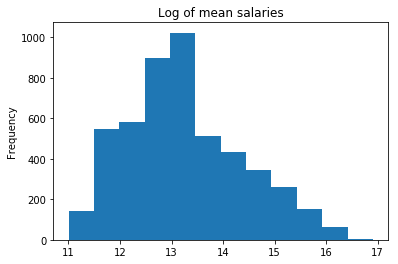

In [12]:
np.log(salary.groupby('player_id')['salary'].mean()).plot(kind='hist', bins=12, title='Log of mean salaries')

In [13]:
def distribution_salary(year):
    np.log(salary[(salary.year == year)].salary).plot(kind='hist', bins=20, title=f'Log salaries in {year}')

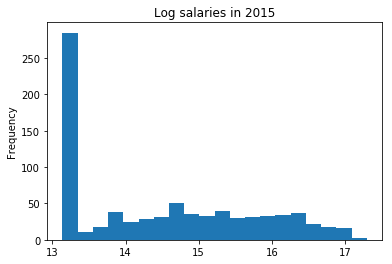

In [14]:
distribution_salary(2015)

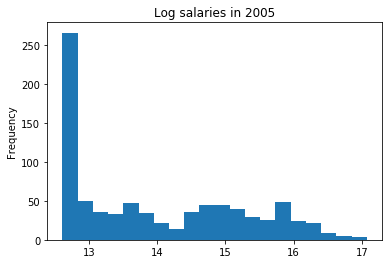

In [15]:
distribution_salary(2005)

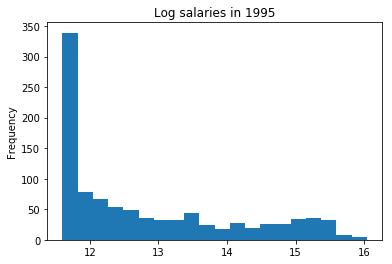

In [16]:
distribution_salary(1995)

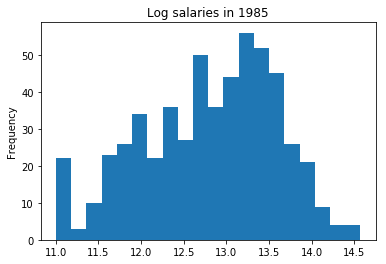

In [17]:
distribution_salary(1985)

1985 is the only year in which the distributions of individual salaries appears to be fairly normal.

#### By year (team totals)

In [18]:
import seaborn as sns

In [19]:
team_salary = team.merge(salary)
winners = team_salary[(team_salary.w / team_salary.l) >= 1]
losers = team_salary[(team_salary.w / team_salary.l) < 1]

In [20]:
def distribution_team_salary(year):
    np.log(winners[(winners.year == year)].groupby('team_id')['salary'].sum()).plot(
        kind='hist', bins=8, title=f'Log team salaries {year}', alpha=0.5)
    np.log(losers[(losers.year == year)].groupby('team_id')['salary'].sum()).plot(
        kind='hist', bins=8, title=f'Log team salaries {year}', alpha=0.5)
    np.log(winners[(winners.year == year) & (winners.ws_win == 'Y')].groupby('team_id')['salary'].sum()).plot(
        kind='hist', bins=8, title=f'Log team salaries {year}', alpha=0.5)

Blue bars represent teams with a record better than .500, orange bars are teams with less than .500.

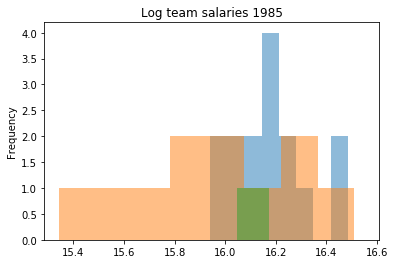

In [21]:
distribution_team_salary(1985)

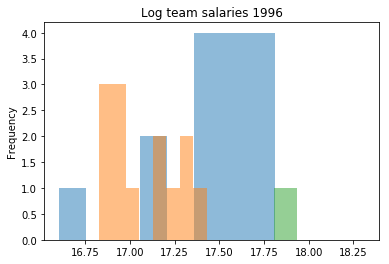

In [22]:
distribution_team_salary(1996)

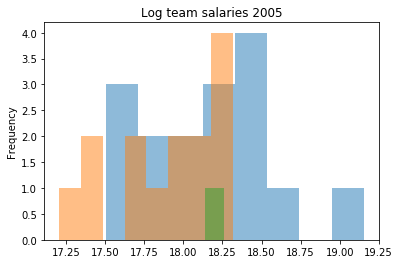

In [23]:
distribution_team_salary(2005)

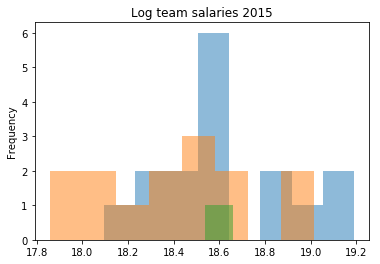

In [24]:
distribution_team_salary(2015)

In [25]:
(salary[salary.year == 2015].groupby('team_id')['salary'].sum() / 1000000).describe()

count     30.000000
mean     117.138086
std       40.371667
min       61.834000
25%       90.591524
50%      112.683050
75%      121.657879
max      215.792000
Name: salary, dtype: float64

### Scatterplots and Regressions

#### Do Higher Team Salaries Translate to More Wins?

In [113]:
team_salary = team.merge(salary)

In [27]:
def salary_year(year):
    team_salary_year = team_salary[team_salary.year == year]
    wins = team_salary_year.groupby('team_id')['w'].median()
    salary_total = team_salary_year.groupby('team_id')['salary'].sum()
    return wins, salary_total

In [28]:
def wins_salary_graph(year):
    wins, salary_total = salary_year(year)
    team_salary_year = team_salary[team_salary.year == year]
    ws_win = team_salary_year[team_salary_year.ws_win == 'Y']
    plt.scatter(np.log(salary_total), wins)
    plt.scatter(np.log(ws_win.groupby('team_id')['salary'].sum()), ws_win.groupby('team_id')['w'].median())
    plt.ylabel("Team wins")
    plt.xlabel("Log team salary")
    plt.title(f"How does salary impact wins?\n{year} season")

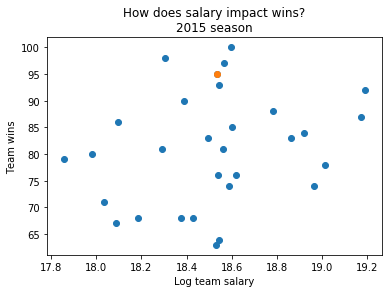

In [29]:
wins_salary_graph(2015)

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/jnelson/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
for year in range(1985, 2016):
    y, X = salary_year(year)
    X = np.log(X)
    X = sm.add_constant(X)
    results = smf.OLS(y, X).fit()
    print(f'\nFor {year}:\n{results.summary()}')


For 1985:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     3.505
Date:                Fri, 10 Nov 2017   Prob (F-statistic):             0.0734
Time:                        17:43:00   Log-Likelihood:                -100.43
No. Observations:                  26   AIC:                             204.9
Df Residuals:                      24   BIC:                             207.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -187.4236    143.288     -1.3


For 2004:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     11.61
Date:                Fri, 10 Nov 2017   Prob (F-statistic):            0.00201
Time:                        17:43:00   Log-Likelihood:                -115.04
No. Observations:                  30   AIC:                             234.1
Df Residuals:                      28   BIC:                             236.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -215.8706     87.137     -2.4

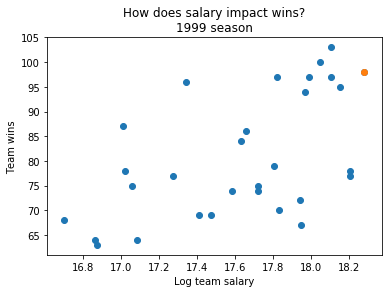

In [51]:
wins_salary_graph(1999)

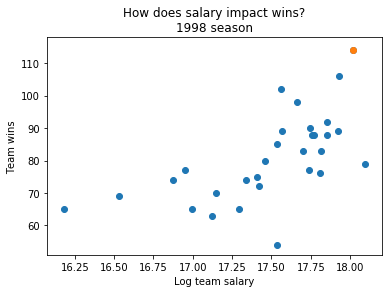

In [33]:
wins_salary_graph(1998)

#### What about the spread of salaries?

In [114]:
def salary_dist_year(year):
    team_salary_year = team_salary[team_salary.year == year]
    wins = team_salary_year.groupby('team_id')['w'].median()
    salary_total = team_salary_year.groupby('team_id')['salary'].sum()
    salary_dist = team_salary_year.groupby('team_id')['salary'].std()
    return wins, salary_total, salary_dist

In [115]:
for year in range(1985, 2016):
    y, X1, X2 = salary_dist_year(year)
    X = pd.concat([X1,X2],axis=1)
    X = np.log(X)
    X = sm.add_constant(X)
    results = smf.OLS(y, X).fit()
    print(f'\nFor {year}:\n{results.summary()}')


For 1985:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     2.390
Date:                Sun, 12 Nov 2017   Prob (F-statistic):              0.114
Time:                        15:25:35   Log-Likelihood:                -99.749
No. Observations:                  26   AIC:                             205.5
Df Residuals:                      23   BIC:                             209.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -193.4270    142.681     -1.3


For 1998:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     9.654
Date:                Sun, 12 Nov 2017   Prob (F-statistic):           0.000687
Time:                        15:25:35   Log-Likelihood:                -112.11
No. Observations:                  30   AIC:                             230.2
Df Residuals:                      27   BIC:                             234.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -277.2724     81.564     -3.3


For 2010:
                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2.151
Date:                Sun, 12 Nov 2017   Prob (F-statistic):              0.136
Time:                        15:25:36   Log-Likelihood:                -111.79
No. Observations:                  30   AIC:                             229.6
Df Residuals:                      27   BIC:                             233.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.9833     90.734     -1.0

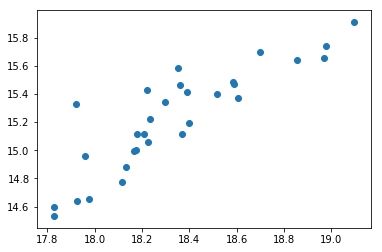

In [121]:
y, X1, X2 = salary_dist_year(2012)
X = pd.concat([X1,X2],axis=1)
plt.scatter(np.log(X1),np.log(X2))

### Salary by Position

In [37]:
appearances[appearances.year > 1984].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38746 entries, 62205 to 100950
Data columns (total 22 columns):
year         38746 non-null int64
team_id      38746 non-null object
league_id    38746 non-null object
player_id    38746 non-null object
g_all        38543 non-null float64
gs           38543 non-null float64
g_batting    38746 non-null int64
g_defense    38543 non-null float64
g_p          38746 non-null int64
g_c          38746 non-null int64
g_1b         38746 non-null int64
g_2b         38746 non-null int64
g_3b         38746 non-null int64
g_ss         38746 non-null int64
g_lf         38746 non-null int64
g_cf         38746 non-null int64
g_rf         38746 non-null int64
g_of         38746 non-null int64
g_dh         38746 non-null float64
g_ph         38746 non-null float64
g_pr         34360 non-null float64
age          38739 non-null float64
dtypes: float64(7), int64(12), object(3)
memory usage: 6.8+ MB


In [38]:
appearances['str_pos'] = appearances[['g_p', 'g_c', 'g_1b', 'g_2b', 'g_3b', 'g_ss',
                                'g_lf', 'g_cf', 'g_rf', 'g_dh']].idxmax(axis=1).str.replace('g_', '')

In [39]:
appearances[appearances.year > 1984].groupby('str_pos').size()

str_pos
1b     2171
2b     2308
3b     2230
c      3172
cf     1978
dh      810
lf     2857
p     18971
rf     2250
ss     1999
dtype: int64

#### Do starters play more seasons than non-starters?

A friend suggested there may be a relationship between number of games played per year and how long a player remains in the MLB. The scatterplot below shows somewhat of a U-shaped relationship between the two. The cluster in the bottom-left are a majority of players who rarely start games and only play in the MLB for a few years.

In [40]:
app_salary = appearances.merge(salary)

In [97]:
seasons = app_salary.groupby('player_id').size()
gs = app_salary.groupby('player_id')['gs'].mean()
g = app_salary.groupby('player_id')['g_all'].mean()
age = app_salary.groupby('player_id')['age'].max()

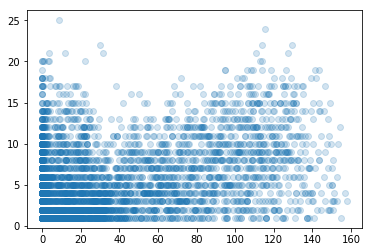

In [105]:
plt.scatter(gs, seasons, alpha=0.2)

#### Salary by position

In [43]:
app_salary[app_salary.year == 2015].groupby('str_pos')['salary'].median() / 1000000

str_pos
1b    3.10000
2b    1.07500
3b    2.52500
c     1.03750
cf    1.65000
dh    6.58300
lf    2.10000
p     1.48000
rf    4.10000
ss    1.44375
Name: salary, dtype: float64

In [44]:
positions = {}
for pos in ['p', 'c', '1b', '2b', '3b', 'ss', 'lf', 'cf', 'rf', 'dh']:
    positions[(pos.replace('', ''))] = app_salary[app_salary.str_pos == pos]

In [45]:
def distribution_salary_pos(year, pos):
    pos_df = app_salary[app_salary.str_pos == pos]
    np.log(pos_df[(pos_df.year == year)].groupby('player_id')['salary'].mean()).plot(
        kind='hist', bins=10, title=f'Log salaries for {pos} in {year}', alpha=0.5)

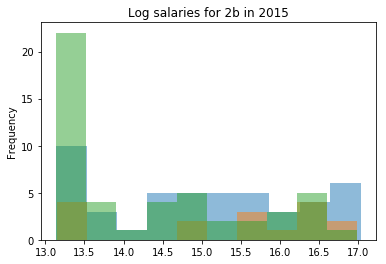

In [46]:
distribution_salary_pos(2015, '1b')
distribution_salary_pos(2015, 'dh')
distribution_salary_pos(2015, '2b')

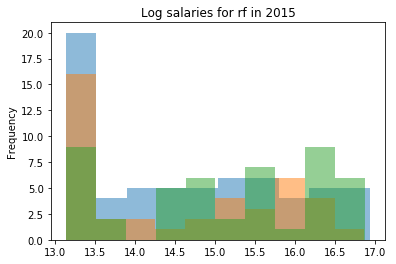

In [47]:
distribution_salary_pos(2015, 'lf')
distribution_salary_pos(2015, 'cf')
distribution_salary_pos(2015, 'rf')

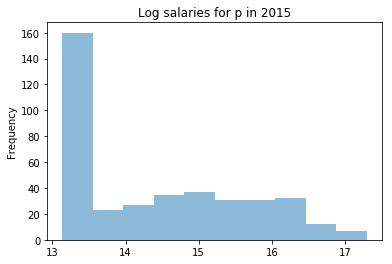

In [48]:
distribution_salary_pos(2015, 'p')

### Player Features

In [86]:
features = player.merge(appearances)

In [87]:
features = features.merge(salary)

In [88]:
features = features.iloc[:,[0,2,3,5,6,7,8,11,12,13,14,15,31,32,33]]

In [89]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24503 entries, 0 to 24502
Data columns (total 15 columns):
player_id     24503 non-null object
name_first    24503 non-null object
name_last     24503 non-null object
weight        24503 non-null float64
height        24503 non-null float64
bats          24503 non-null object
throws        24503 non-null object
year          24503 non-null int64
team_id       24503 non-null object
league_id     24503 non-null object
g_all         24434 non-null float64
gs            24434 non-null float64
age           24499 non-null float64
str_pos       24503 non-null object
salary        24503 non-null int64
dtypes: float64(5), int64(2), object(8)
memory usage: 3.0+ MB


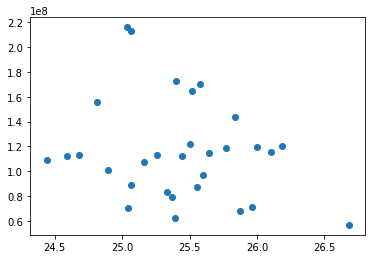

In [109]:
team_age = features[features.year == 2015].groupby('team_id')['age'].mean()
team_salary = features[features.year == 2015].groupby('team_id')['salary'].sum()
plt.scatter(team_age, team_salary)

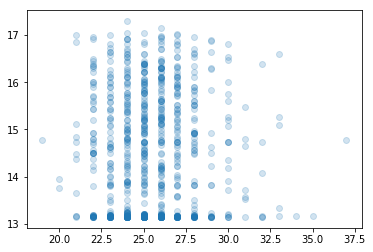

In [93]:
plt.scatter(features[features.year == 2015].age, np.log(features[features.year == 2015].salary), alpha=0.2)